In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils import *


In [3]:
# Load the data
file_path_analysed = './cvd/cvd_main+ado/final_cohort_cvd.csv'
df = pd.read_csv(file_path_analysed)
len(df)

/tmp/ipykernel_208185/7625827.py:7: DtypeWarning: Columns (2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3768,3769,3770,3849,3850,3851,3861,3862,3878,3879,3883,5413,5414,5419,5420,5421,5422,5423,5424,5473,8179,8180,8181,8208,8209,8210,8211,8212,8230,8231,8232,8276,8363,8364,8365,8366,8367,8385,8400,8401,8402,8403,8404,8405,8406,8407,8408,8409,8410,8445,8446,8477,8478,8479,8480,8481,8482,8483,8484,8485,8486,8487,8488,8489,8490,8491,8544,8545,8595,8596,8597,8598,8599,8600,8601,8602,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612,8613,8614,8615,8616,8617,8618,8619,8620,8621,8622,8623,8624,8625,8626,8627,8628,8629,8630,8631,8632,8633,8634,8635,8636,8760,8761,8797,8818,8819,8820,8821,8822,8823,8824,8841,8842,8861,8862,8863,8864,8865,8866,8867,8868,8

617

In [25]:
data_dict = get_data_dict(file_path_analysed, 'cancer', 'cancer')
_, deltas = get_main_infos(data_dict, 'first_imaging_visit_date')

/home/dmitrii/GitHub/ukbb_risk_assessment/utils.py:116: DtypeWarning: Columns (68,1186,1187,1188,1258,1259,1260,1552,2765,2766,2886,2887,2888,2889,2890,2993,2994,3114,3115,3116,3117,3118,3851,3856,3857,3858,3859,3860,3861,3881,3882,4037,4039,5419,5420,5421,5473,5585,5851,5853,5856,5858,5861,5863,5865,5867,5869,5871,5873,5875,5877,5879,6122,6124,6126,6128,6134,6136,8182,8405,8406,8407,8481,8482,8483,8484,8485,8612,8613,8614,8615,8616,8617,8618,8619,8620,8621,8622,8623,8624,8625,8626,8819,8820,8821,8822,8823,8824,8825,8826,8827,8841,8876,8877,8878,8879,8880,8881,8958,8961,9000,9042,9224,9225,9226,9278,9279,9280,9281,9282,9341,9421,9422,9423,9424,9425,9426,9427,9428,9429,9430,9431,9432,9702,9703,9704,9705,9706,9707,9708,9851,9852,9853,9854,9855,9856,9857,9858,9859,9860,9861,9862,10042,10132,10133,10134,10135,10136,10137,10138,10230,10232,10233,10238,10245,10246,10357,10374,10378,10380,10384,10387,10389,10395,10402,10405,10406,10408,10409) have mixed types. Specify dtype option on import o

mean: 614.1951547779273, std: 471.61574839623347, n: 743


In [26]:
deltas = pd.DataFrame(deltas, columns=['deltas'])
#number of deltas with smaller than 365 days
for i in range(1, 10):
    print("{} diagnosed within {} year(s) after first imaging visit".format(deltas[deltas['deltas'] < 365*i].count(), i))

deltas    280
dtype: int64 diagnosed within 1 year(s) after first imaging visit
deltas    490
dtype: int64 diagnosed within 2 year(s) after first imaging visit
deltas    616
dtype: int64 diagnosed within 3 year(s) after first imaging visit
deltas    691
dtype: int64 diagnosed within 4 year(s) after first imaging visit
deltas    730
dtype: int64 diagnosed within 5 year(s) after first imaging visit
deltas    743
dtype: int64 diagnosed within 6 year(s) after first imaging visit
deltas    743
dtype: int64 diagnosed within 7 year(s) after first imaging visit
deltas    743
dtype: int64 diagnosed within 8 year(s) after first imaging visit
deltas    743
dtype: int64 diagnosed within 9 year(s) after first imaging visit


array([[<Axes: title={'center': 'deltas'}>]], dtype=object)

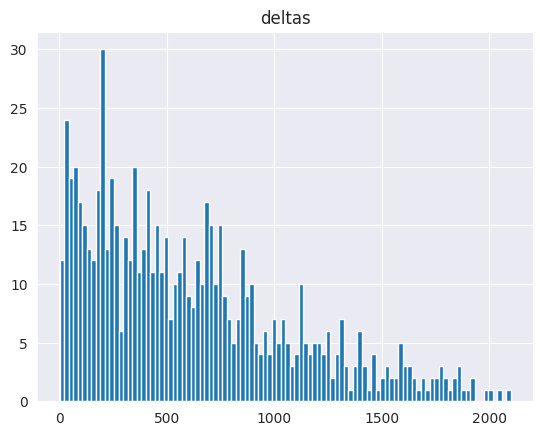

In [5]:
deltas.hist(bins=100)

In [6]:
MODE = 'cancer'
sex_field = ["31-0.0"]
sex_field_genetic = ['22001-0.0']
age_field = ["21003-0.0", "21003-1.0", "21003-2.0", "21003-3.0"]
ethnicity = ["21000-0.0", "21000-1.0", "21000-2.0"]
bmi = ["21001-0.0", "21001-1.0", "21001-2.0", "21001-3.0"]
death_date = ["40000-0.0"]#, "40000-1.0"]
death_cause_primary = ["40001-0.0"]#, "40001-1.0"]
#death_cause_secondary = ["40002-0.0"]#, "40002-1.0"]
icd_diagnosis_field, icd_diagnosis_date_field = get_icd_infos('cancer')
visit_dates_fields = ['53-0.0', '53-1.0', '53-2.0', '53-3.0']
icd_code_cols = [col for col in df.columns if col.startswith(icd_diagnosis_field)]
icd_date_cols = [col for col in df.columns if col.startswith(icd_diagnosis_date_field)]
patterns, PATTERN_SELECTION_MODE = get_patterns(MODE)
columns_to_read = ['eid'] + sex_field + sex_field_genetic + age_field + ethnicity + bmi + death_date + death_cause_primary + icd_code_cols + icd_date_cols + visit_dates_fields

In [7]:
# find 

In [8]:
#df = pd.read_csv('./cvd+ado_all.csv', usecols=columns_to_read)
#df = pd.read_csv('./cvd+ado_all_after_first_imaging.csv', usecols=columns_to_read)
df = pd.read_csv(file_path_analysed, usecols=columns_to_read)

/tmp/ipykernel_251106/2753513082.py:3: DtypeWarning: Columns (8209,8210,8231,8232) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path_analysed, usecols=columns_to_read)


In [9]:
pd.notna(df[death_date[0]].iloc[0])

False

In [10]:
for col in visit_dates_fields + icd_date_cols + death_date:
    df[col] = pd.to_datetime(df[col], errors='coerce', format='%Y-%m-%d') # therefore, pd.to_datetime is used!!!

In [11]:
min(df.iloc[0][icd_date_cols])

Timestamp('2018-04-03 00:00:00')

In [12]:
deltas = []
for index, row in df.iterrows():
    if row[death_date[0]] is pd.NaT:
        continue
    delta = row[death_date[0]] - min(row[icd_date_cols])
    if delta < pd.Timedelta(0):
        print("ALERT", row['eid'], delta)
    deltas.append(delta.days)
    #print(row['eid'], delta) 
deltas = pd.DataFrame(deltas)
print("Died in days after\nfirst cancer diagnosis")
deltas.describe()

Died in days after
first cancer diagnosis


,0
count,140.000000
mean,378.900000
std,353.814391
min,3.000000
25%,97.250000
50%,307.000000
75%,566.000000
max,2049.000000


In [13]:
deltas = []
for index, row in df.iterrows():
    if row[death_date[0]] is pd.NaT:
        continue
    delta = row[death_date[0]] - min(row[icd_date_cols])
    if row[death_cause_primary[0]] in patterns:
        deltas.append(delta.days)
    #print(row['eid'], delta) 
deltas = pd.DataFrame(deltas)
print("Died in days after\nfirst cancer diagnosis\nand cause is cancer")
deltas.describe()

Died in days after
first cancer diagnosis
and cause is cancer


,0
count,27.000000
mean,448.444444
std,350.323843
min,14.000000
25%,233.000000
50%,387.000000
75%,621.500000
max,1417.000000


In [14]:
# seaborn pie chart for sex_field where 1 male and 0 female in seaborn

sns.set_theme(style="whitegrid")


Males mean age: 58.0 +- 6.8
Males min and max age: 40 and 69


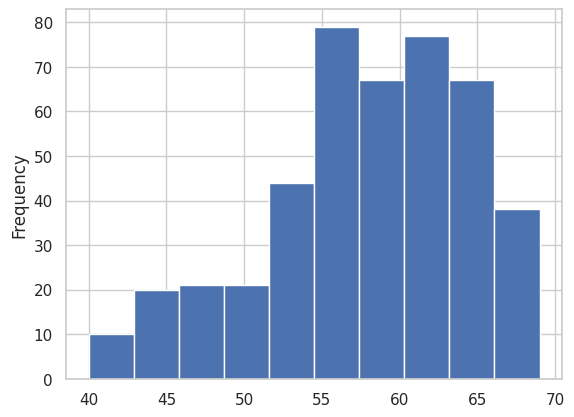

In [15]:
# age by sex 
males = df[df[sex_field[0]] == 1]
males[age_field[0]].plot.hist()
print("Males mean age: {:.1f} +- {:.1f}".format(males[age_field[0]].mean(), males[age_field[0]].std()))
#print("Males mean age", males[age_field[0]].mean(), " +- ", males[age_field[0]].std())
print("Males min and max age:", males[age_field[0]].min(), "and", males[age_field[0]].max())

Females mean age: 55.7 +- 7.1
Females min and max age: 40 and 68


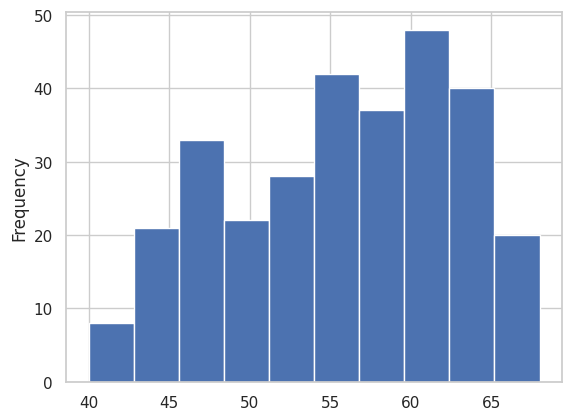

In [16]:
females = df[df[sex_field[0]] == 0]
females[age_field[0]].plot.hist()
print("Females mean age: {:.1f} +- {:.1f}".format(females[age_field[0]].mean(), females[age_field[0]].std()))
print("Females min and max age:", females[age_field[0]].min(), "and", females[age_field[0]].max())

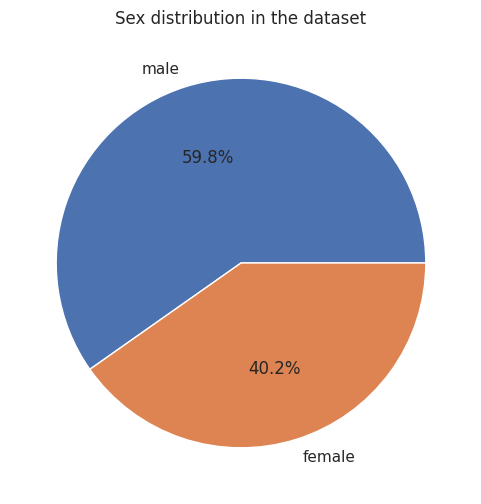

In [17]:
# ethnicity
def decode_sex(lst):
    return list(map(lambda x: "female" if x==0 else "male", lst))

def decode_eth(lst):
    coding_table = pd.read_csv('./coding1001.tsv', sep='\t')
    # make dictionary from coding_table['coding'] and coding_table['meaning']
    coding_dict = dict(zip(coding_table['coding'], coding_table['meaning']))
    return list(map(lambda x: coding_dict[x], lst))        
    
        
value_counts = df[sex_field[0]].value_counts()
keys = decode_sex(value_counts.keys().tolist())
values = value_counts.values.tolist()

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(values, labels=keys, autopct='%1.1f%%')
plt.title('Sex distribution in the dataset')
plt.show()

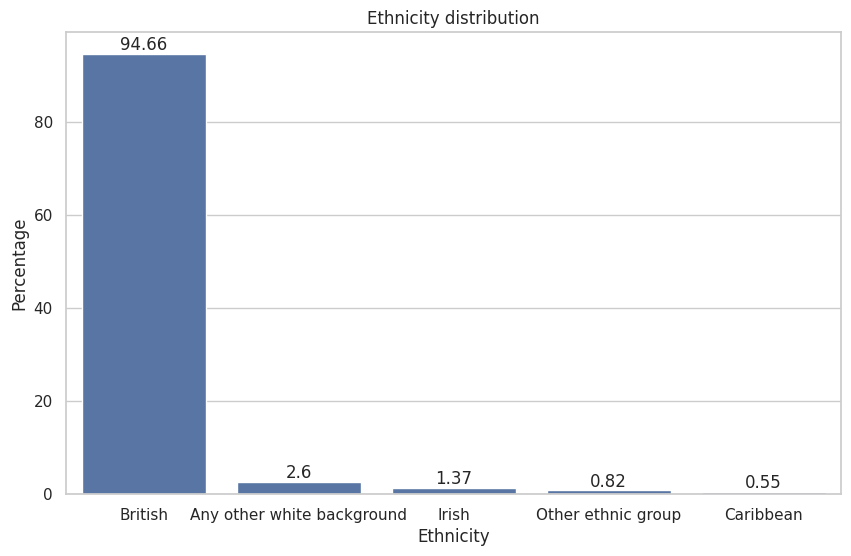

In [18]:
def decode_eth(lst):
    coding_table = pd.read_csv('./coding1001.tsv', sep='\t')
    # make dictionary from coding_table['coding'] and coding_table['meaning']
    coding_dict = dict(zip(coding_table['coding'], coding_table['meaning']))
    return list(map(lambda x: coding_dict[x], lst))       

value_counts = df[ethnicity[0]].value_counts()
keys = decode_eth(value_counts.keys().tolist())[:5]
values = value_counts.values.tolist()[:5]
df_to_plot = pd.DataFrame({'Category': keys, 'Count': values})

# Create the bar plot using a lambda function as an estimator
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Category', 
    y='Count', 
    data=df_to_plot, 
    estimator=lambda x: round(sum(x) / df_to_plot['Count'].sum() * 100, 2), 
    orient='v'
)

for i in ax.containers:
    #i.datavalues = np.round(i.datavalues, 1)
    ax.bar_label(i,)

# Add labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.title('Ethnicity distribution')

# Show the plot
plt.show()

 mean BMI: 27.1 +- 4.2


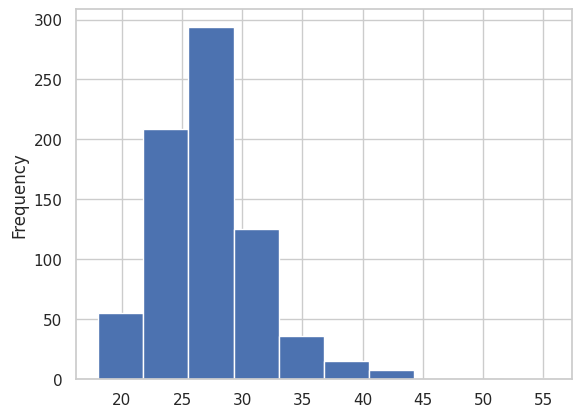

In [19]:
# seaborn pie chart for sex_field in df
df[bmi[0]].plot.hist()
print(" mean BMI: {:.1f} +- {:.1f}".format(df[bmi[0]].mean(), df[bmi[2]].std()))


In [20]:
cancer_types = get_cancer_types()
cancer_types_distribution = {}
for eid in data_dict:
    for icd_code in data_dict[eid]['icd_codes']:
        for cancer_type in cancer_types:
            for icd_code_pattern in cancer_types[cancer_type]:
                if icd_code.startswith(icd_code_pattern):
                    if cancer_type in cancer_types_distribution.keys():
                        cancer_types_distribution[cancer_type] += 1
                    else:
                        cancer_types_distribution[cancer_type] = 1
                    

In [21]:
sum(cancer_types_distribution.values())

761

In [22]:
cancer_types_distribution

{'female_genital': 28,
 'respiratory': 36,
 'male_genital': 196,
 'head_neck': 15,
 'lymphoid_haematopoietic': 77,
 'breast': 127,
 'digestive': 153,
 'endocrine': 9,
 'skin_wo_c44': 40,
 'urinary': 45,
 'central_nervous': 17,
 'mesothelial_soft_tissue': 8,
 'ill_defined_secondary': 10}

In [25]:
# delete c44 key from dictionary
del cancer_types_distribution[('c44')]

array([<Axes: ylabel='0'>], dtype=object)

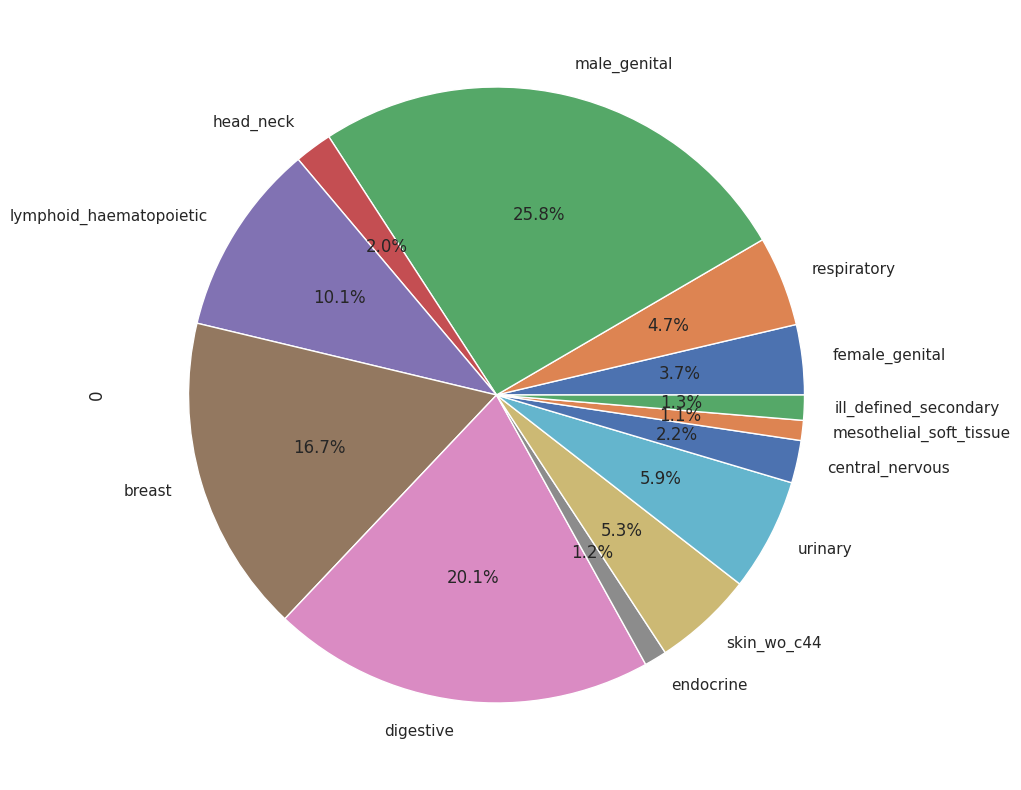

In [23]:
pd.DataFrame(cancer_types_distribution, index=[0]).T.plot.pie(subplots=True, figsize=(10, 10), autopct='%1.1f%%', legend=False)

In [28]:
sum(cancer_types_distribution.values())

939

In [4]:
[col for col in df.columns if col.startswith('40021')]

['40021-0.0',
 '40021-1.0',
 '40021-2.0',
 '40021-3.0',
 '40021-4.0',
 '40021-5.0',
 '40021-6.0',
 '40021-7.0',
 '40021-8.0',
 '40021-9.0',
 '40021-10.0',
 '40021-11.0',
 '40021-12.0',
 '40021-13.0',
 '40021-14.0',
 '40021-15.0',
 '40021-16.0',
 '40021-17.0',
 '40021-18.0',
 '40021-19.0',
 '40021-20.0',
 '40021-21.0']